In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
dataset = pd.read_csv("./google-play-store-apps/googleplaystore.csv")
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h3>Type</h3>

In [91]:
dataset['Type'].describe()

count     10840
unique        3
top        Free
freq      10039
Name: Type, dtype: object

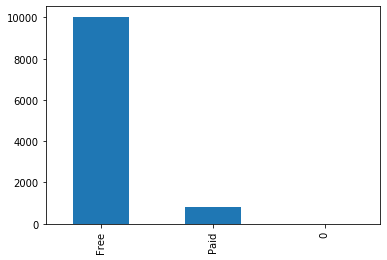

In [92]:
dataset['Type'].value_counts().plot(kind='bar')

This describes the values of column (Type) where the count = 10840, which means that there is one record that has no type value. The type can be represented by three different values where there is 10039 apps that are free.

In [93]:
dataset['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

We now are able to visualize that apps are either free, paid, undefined(nan), or 0. '0' seems to be unusual value for type attribute. So, we need to visualize its records.

In [94]:
dataset[dataset['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Clearly this record is not recorded correctly, so it is better to be removed. 

In [95]:
dataset = dataset[dataset['Type']!='0']

After dealing with null values in rating the null value in the type will be removed. So, we are going to drop the null values of rating.

In [96]:
dataset = dataset[pd.notnull(dataset['Rating'])]

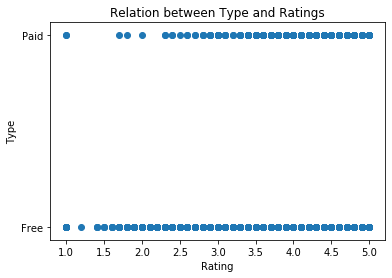

In [97]:
plt.scatter(dataset['Rating'], dataset['Type'])

plt.title('Relation between Type and Ratings')

plt.xlabel('Rating')

plt.ylabel('Type')

plt.show()

Clearly there is no correlation between type and rating as there are some apps that are paid and has low and high rating, and also the free apps have high and low rating.
Now we need type attribute to be numeric, so the model can deal with it if needed.

In [98]:
data = dataset.copy()
data['Free'] = data['Type'].map(lambda out :1  if out =='Free' else 0)
data.drop(['Type'], axis=1, inplace=True)

<h3>Conclusion</h3>

Apps are mainly classified into either paid or free, where most of the apps are free ones. Moreover, There is no clear relation between Type and Rating.

<h3>Price</h3>

In [99]:
dataset['Price'].describe()

count     9366
unique      73
top          0
freq      8719
Name: Price, dtype: object

In [100]:
dataset['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

This describes that all records have Price attribute, where most of the apps' price equal to zero which means most of the apps are free which is concluded also in the type part. Also, we can deduce that the currency of the data is dollar. However, we need to represent Price as numeric so we can deliver it to the model if needed and for better visualization.

In [101]:
dataset['Price'] = dataset['Price'].apply(lambda x: x.replace('$',''))
dataset['Price'] = dataset['Price'].apply(lambda x: float(x))

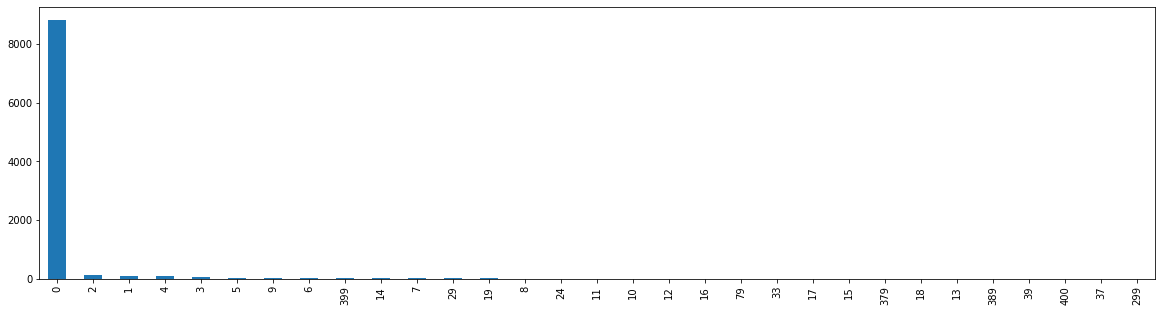

In [108]:
dataset2 = dataset.copy()
dataset2['Price'] = dataset2['Price'].apply(lambda x: int(x))
dataset2['Price'].value_counts().plot(kind='bar',figsize=(20,5))

In [60]:
dataset['Price'].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

This tells that the average of prices is approxamitely one dollar and the most expensive app equal to 400 dolars.

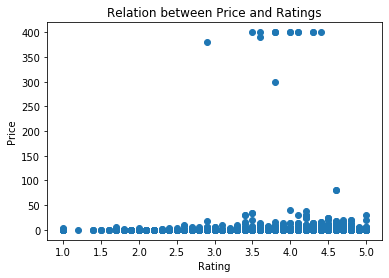

In [71]:
plt.scatter(dataset['Rating'], dataset['Price'])

plt.title('Relation between Price and Ratings')

plt.xlabel('Rating')

plt.ylabel('Price')

plt.show()

From the figure we can deduce that for free or low price apps it can have any rating, while for expensive apps, it always gives high ratings.

In [72]:
dataset['Price'].corr(dataset['Rating'])

-0.02190330080135546